# Choropleths

## What is a Choropleth?

A choropleth is a map where each region is colored according to some statistic.

choro + pleth: "region" + "many"

## Choropleths

The file http://datasci112.stanford.edu/data/kidney_cancer_by_county.csv contains data on kidney cancer deaths by county in the 1980s. (Note that Alaska is not in this data.)

Let's make a choropleth showing the kidney cancer death rate by county. We will first need to divide cancer deaths by population to get the rate.


In [1]:
import pandas as pd

df_cancer = pd.read_csv("data/kidney_cancer_by_county.csv")
df_cancer

,county,fips,deaths,population
0,"Autauga County, Alabama",1001,3,63418
1,"Baldwin County, Alabama",1003,22,183099
2,"Barbour County, Alabama",1005,1,33652
3,"Bibb County, Alabama",1007,1,30664
4,"Blount County, Alabama",1009,8,89944
...,...,...,...,...
3105,"Sweetwater County, Wyoming",56037,3,108207
3106,"Teton County, Wyoming",56039,0,26530
3107,"Uinta County, Wyoming",56041,2,50503
3108,"Washakie County, Wyoming",56043,2,23888


In [2]:
df_cancer["cancer_death_rate"] = (df_cancer["deaths"] /
                                  df_cancer["population"])
df_cancer

,county,fips,deaths,population,cancer_death_rate
0,"Autauga County, Alabama",1001,3,63418,0.000047
1,"Baldwin County, Alabama",1003,22,183099,0.000120
2,"Barbour County, Alabama",1005,1,33652,0.000030
3,"Bibb County, Alabama",1007,1,30664,0.000033
4,"Blount County, Alabama",1009,8,89944,0.000089
...,...,...,...,...,...
3105,"Sweetwater County, Wyoming",56037,3,108207,0.000028
3106,"Teton County, Wyoming",56039,0,26530,0.000000
3107,"Uinta County, Wyoming",56041,2,50503,0.000040
3108,"Washakie County, Wyoming",56043,2,23888,0.000084


## Shapefiles

First, we need a shapefile of the counties of the U.S. Let's download it from the [U.S. Census Bureau website](https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html). Remember that our data above is from the 1980s. So we should choose a shapefile from around that time. Let's download the 1990 shapefile.

Next, we upload the `.zip` file to the Colab runtime and read in the shapefile below.

In [3]:
import geopandas as gpd

# Make sure you have uploaded the .zip file from the Census Bureau to Colab.
gdf_counties = gpd.read_file("data/co99_d90_shp.zip")
gdf_counties

,AREA,PERIMETER,CO99_D90_,CO99_D90_I,ST,CO,NAME,geometry
0,52.181640,60.212600,2,3218,02,185,North Slope,"POLYGON ((-141.06357 69.55614, -141 69.43542, ..."
1,79.372160,63.927420,3,3219,02,290,Yukon-Koyukuk,"POLYGON ((-141 68.42812, -141 68.33979, -141 6..."
2,19.455770,42.409050,4,3220,02,188,Northwest Arctic,"POLYGON ((-155.30855 68.0071, -155.31758 67.87..."
3,10.648980,33.098320,5,3222,02,180,Nome,"POLYGON ((-164.39871 66.58172, -164.38963 66.5..."
4,0.002353,0.305455,6,3223,02,180,Nome,"POLYGON ((-166.13272 66.21559, -166.16594 66.2..."
...,...,...,...,...,...,...,...,...
3318,0.002972,0.413141,3320,3211,15,005,Kalawao,"POLYGON ((-156.91646 21.17019, -156.92104 21.1..."
3319,0.163739,2.272311,3321,3213,15,009,Maui,"POLYGON ((-156.37389 20.57792, -156.38083 20.5..."
3320,0.031595,0.756062,3322,3214,15,009,Maui,"POLYGON ((-156.9668 20.73497, -156.97102 20.74..."
3321,0.010018,0.524409,3323,3215,15,009,Maui,"POLYGON ((-156.6758 20.50377, -156.67879 20.50..."


## Joining the Data

To make a choropleth, we will need a `GeoDataFrame` that contains both the geometries and the cancer death rates. This means that we have to join `gdf_counties` to `df_cancer`. But what key do we join on?

The [FIPS code](https://en.wikipedia.org/wiki/Federal_Information_Processing_Standards) is a federal standard for identifying places. Counties are identified by a 5-digit code consisting of a 2-digit state code and a 3-digit county code.

The cancer data has the 5-digit county FIPS code as an integer. The shapefile has the state and county FIPS codes in separate columns. So let's combine them into a single FIPS code.

In [4]:
gdf_counties["fips"] = (
    gdf_counties["ST"].str.lstrip("0") +
    gdf_counties["CO"]
).astype(int)
gdf_counties

,AREA,PERIMETER,CO99_D90_,CO99_D90_I,ST,CO,NAME,geometry,fips
0,52.181640,60.212600,2,3218,02,185,North Slope,"POLYGON ((-141.06357 69.55614, -141 69.43542, ...",2185
1,79.372160,63.927420,3,3219,02,290,Yukon-Koyukuk,"POLYGON ((-141 68.42812, -141 68.33979, -141 6...",2290
2,19.455770,42.409050,4,3220,02,188,Northwest Arctic,"POLYGON ((-155.30855 68.0071, -155.31758 67.87...",2188
3,10.648980,33.098320,5,3222,02,180,Nome,"POLYGON ((-164.39871 66.58172, -164.38963 66.5...",2180
4,0.002353,0.305455,6,3223,02,180,Nome,"POLYGON ((-166.13272 66.21559, -166.16594 66.2...",2180
...,...,...,...,...,...,...,...,...,...
3318,0.002972,0.413141,3320,3211,15,005,Kalawao,"POLYGON ((-156.91646 21.17019, -156.92104 21.1...",15005
3319,0.163739,2.272311,3321,3213,15,009,Maui,"POLYGON ((-156.37389 20.57792, -156.38083 20.5...",15009
3320,0.031595,0.756062,3322,3214,15,009,Maui,"POLYGON ((-156.9668 20.73497, -156.97102 20.74...",15009
3321,0.010018,0.524409,3323,3215,15,009,Maui,"POLYGON ((-156.6758 20.50377, -156.67879 20.50...",15009


Now, we can join `gdf_counties` to `df_cancer` on this combined FIPS code.

In [5]:
gdf_counties_cancer = gdf_counties.merge(
    df_cancer,
    on="fips",
    how="outer"  # outer join will help us detect counties that failed to join
    )
gdf_counties_cancer

,AREA,PERIMETER,CO99_D90_,CO99_D90_I,ST,CO,NAME,geometry,fips,county,deaths,population,cancer_death_rate
0,0.150194,2.013205,2847,2730,01,001,Autauga,"POLYGON ((-86.41315 32.70726, -86.4112 32.4098...",1001,"Autauga County, Alabama",3.0,63418.0,0.000047
1,0.409513,4.245380,3050,2939,01,003,Baldwin,"POLYGON ((-87.61591 31.24429, -87.61545 30.997...",1003,"Baldwin County, Alabama",22.0,183099.0,0.000120
2,0.223391,2.480042,2931,2798,01,005,Barbour,"POLYGON ((-85.0561 32.0629, -85.05891 32.0465,...",1005,"Barbour County, Alabama",1.0,33652.0,0.000030
3,0.156396,1.884780,2766,2654,01,007,Bibb,"POLYGON ((-87.02686 33.24635, -87.02573 33.209...",1007,"Bibb County, Alabama",1.0,30664.0,0.000033
4,0.164332,2.331763,2596,2494,01,009,Blount,"POLYGON ((-86.30352 34.099, -86.32268 34.07219...",1009,"Blount County, Alabama",8.0,89944.0,0.000089
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3318,2.936913,7.658663,852,744,56,037,Sweetwater,"POLYGON ((-110.053 42.2708, -109.49607 42.2633...",56037,"Sweetwater County, Wyoming",3.0,108207.0,0.000028
3319,1.224996,5.005761,490,376,56,039,Teton,"POLYGON ((-111.05456 44.66634, -110.66711 44.6...",56039,"Teton County, Wyoming",0.0,26530.0,0.000000
3320,0.581269,3.157737,986,847,56,041,Uinta,"POLYGON ((-111.0451 41.5799, -110.04729 41.577...",56041,"Uinta County, Wyoming",2.0,50503.0,0.000040
3321,0.650909,4.238597,566,468,56,043,Washakie,"POLYGON ((-108.54989 44.1685, -107.74149 44.16...",56043,"Washakie County, Wyoming",2.0,23888.0,0.000084


Let's look for missing values.

In [6]:
# in `df_cancer` but not in `gdf_counties`
gdf_counties_cancer[gdf_counties_cancer["geometry"].isnull()]

,AREA,PERIMETER,CO99_D90_,CO99_D90_I,ST,CO,NAME,geometry,fips,county,deaths,population,cancer_death_rate


In [7]:
# in `gdf_counties` but not in `df_cancer`
gdf_counties_cancer[gdf_counties_cancer["cancer_death_rate"].isnull()]

,AREA,PERIMETER,CO99_D90_,CO99_D90_I,ST,CO,NAME,geometry,fips,county,deaths,population,cancer_death_rate
68,2.255186,21.193030,54,3278,02,013,Aleutians East,"POLYGON ((-159.56232 55.63881, -159.64494 55.6...",2013,NaN,NaN,NaN,NaN
69,0.007890,0.378956,66,3284,02,013,Aleutians East,"POLYGON ((-160.14873 55.37783, -160.28516 55.3...",2013,NaN,NaN,NaN,NaN
70,0.082099,1.613138,67,3285,02,013,Aleutians East,"POLYGON ((-160.53534 55.232, -160.51534 55.182...",2013,NaN,NaN,NaN,NaN
71,0.036923,1.193812,71,3286,02,013,Aleutians East,"POLYGON ((-160.20657 54.88997, -160.25647 54.9...",2013,NaN,NaN,NaN,NaN
72,0.006849,0.352663,72,3287,02,013,Aleutians East,"POLYGON ((-159.51868 55.06691, -159.56068 55.1...",2013,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,0.002972,0.413141,3320,3211,15,005,Kalawao,"POLYGON ((-156.91646 21.17019, -156.92104 21.1...",15005,NaN,NaN,NaN,NaN
1804,0.072640,3.645157,427,323,30,113,Yellowstone National Park,"POLYGON ((-111.04459 45.07379, -111.02856 45.0...",30113,NaN,NaN,NaN,NaN
1949,1.160497,5.367559,2409,2277,35,006,Cibola,"POLYGON ((-107.30944 35.30516, -107.23856 35.3...",35006,NaN,NaN,NaN,NaN
3093,0.000794,0.169025,1861,1642,51,560,Clifton Forge,"POLYGON ((-79.80324 37.81519, -79.81391 37.811...",51560,NaN,NaN,NaN,NaN


## Making the Choropleth

Now that we have joined the cancer data to the geographic data, making the choropleth is easy. We simply pass the `column=` argument to `.plot()`.

<Axes: >

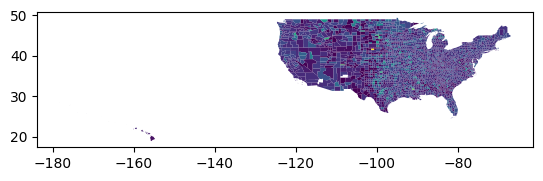

In [8]:
gdf_counties_cancer.plot(column="cancer_death_rate")

Let's make the figure bigger, and set the axes limits to focus on the continental U.S.

(24.0, 50.0)

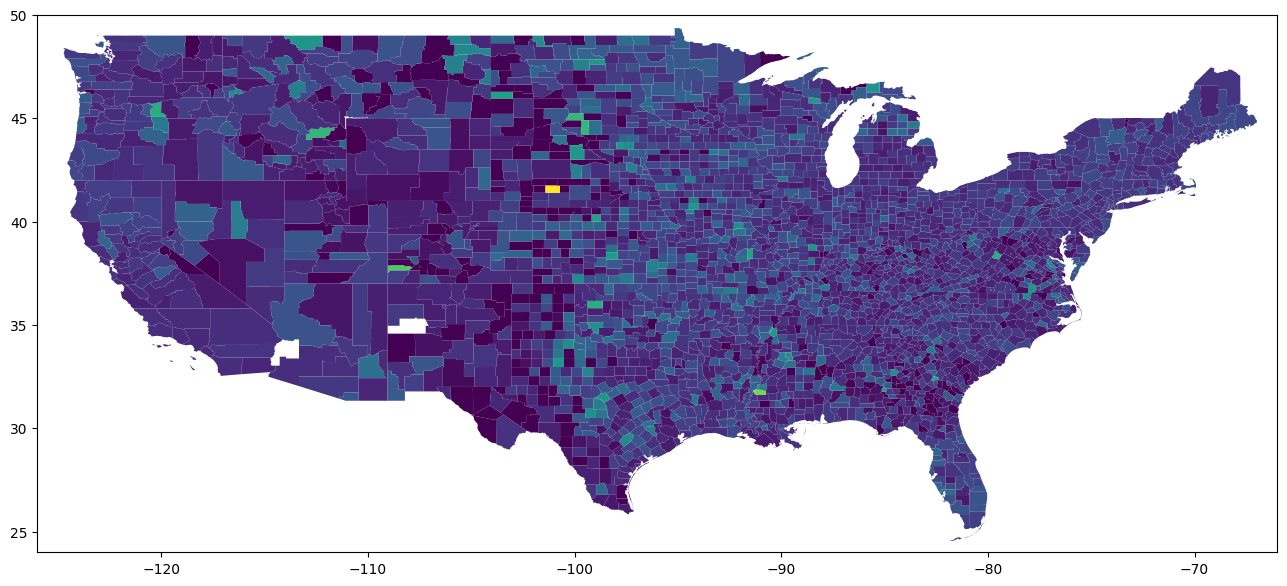

In [9]:
ax = gdf_counties_cancer.plot(
    column="cancer_death_rate",
    figsize=(16, 8))

# Focus on the continental U.S.
ax.set_xlim(-126, -66)
ax.set_ylim(24, 50)

What counties have the highest cancer rates? Let's highlight the counties in the top 10% of the cancer rates in red.

(24.0, 50.0)

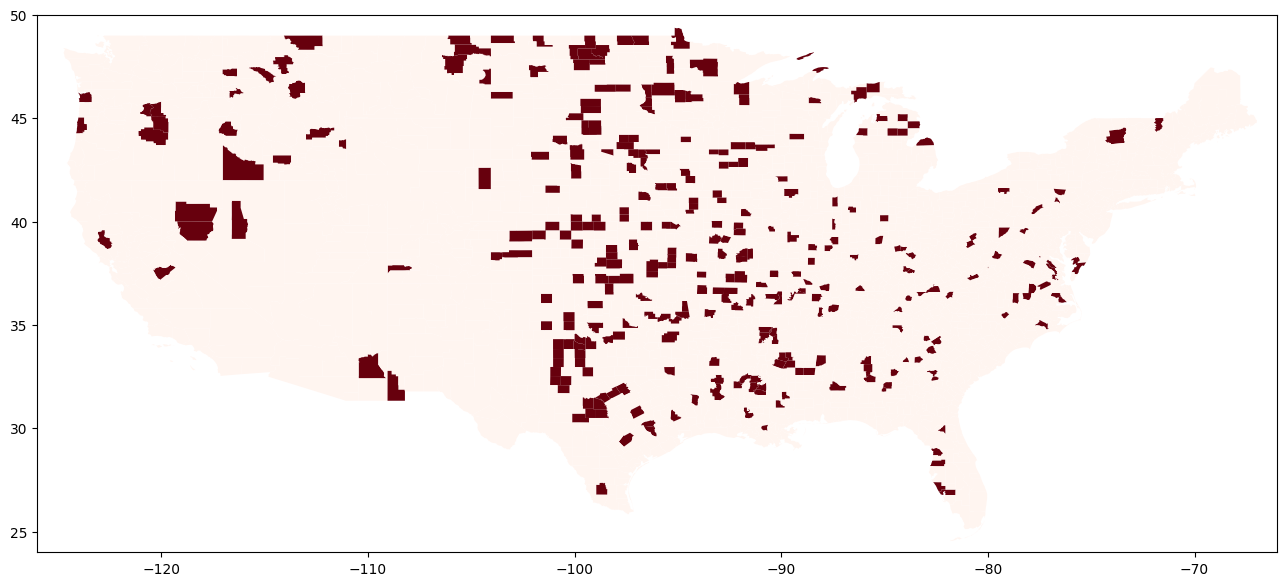

In [10]:
gdf_counties_cancer["to_highlight"] = (
    gdf_counties_cancer["cancer_death_rate"] >=
    gdf_counties_cancer["cancer_death_rate"].quantile(0.90))

ax = gdf_counties_cancer.plot(
    column="to_highlight",
    figsize=(16, 8),
    cmap="Reds")
ax.set_xlim(-126, -66)
ax.set_ylim(24, 50)

Why do you think the counties with the highest kidney cancer death rates are all in the middle of the country?

## Seeing Patterns

- Humans have evolved a remarkable ability to see patterns...
- ...even when there are none.
- Statistics is a science that helps us disentangle real patterns in data from noise by:
    - quantifying the **signal** in a pattern
    - quantifying the **noise**.
- Take a statistics class during your college years! (DATASCI 112 is not a statistics class!)

## Cautions about Choropleth

> "Oh I love those beautiful red areas, that middle of the map. There’s just a little blue here, and a little blue, everything else is bright red." —Donald Trump

> "[Trump] interrupted himself and handed out this map of the electoral college and said that these were the latest figures of the areas of the country that he had won in 2016."

> "There were three of us in the interview...and he had a copy for each of us."

## The Problem with Choropleths

The election choropleth violates one of Tufte’s principles of data visualization:

*The representation of numbers, as physically measured on the surface of thegraph itself, should be directly proportional to the numerical quantities represented.*

Trump mistakes the red area on the map as representing the number of people who voted for him.

## Alternatives to Choropleths

- [dot map](https://carto.maps.arcgis.com/apps/webappviewer/index.html?id=8732c91ba7a14d818cd26b776250d2c3)

- [cartogram](http://www-personal.umich.edu/~mejn/election/2016/)

These maps are highly custom and are difficult to make on your own. 